# Easy Topic Modeling

The text mining technique topic modeling has become a popular procedure for clustering documents into semantic groups. This Jupyter notebook introduces the high-level API of `dariah`, a Python library for topic modeling and visualization.

> Topic modeling algorithms are statistical methods that analyze the words of the original texts to discover the themes that run through them, how those themes are connected to each other, and how they change over time. ([David M. Blei](http://www.cs.columbia.edu/~blei/papers/Blei2012.pdf))

Getting started is _really easy_. All you have to do is import the library – you can train a model straightaway from raw textfiles.

In [1]:
from pathlib import Path

import dariah

## Training the model

Just set four parameters:
1. `directory`: The path to your corpus with some plain text files.
2. `stopwords`: Either a threshold for the most common words to remove, or a list with tokens.
3. `num_topics`: The number of topics.
4. `num_iterations`: The number of iterations.

The default logging level is `WARNING` – if you want to know which texts are currently being processed, or or how much iterations are still left, set the level to `INFO`:
```python
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
```

However, as a very first step, set the path to your corpus:

In [2]:
directory = Path("data", "british-fiction-corpus")

and pass it with additional arguments to the high-level API:

In [3]:
model, vis = dariah.topics(directory,
                           stopwords=100,
                           num_topics=10,
                           num_iterations=1000)

You get a model object back:

In [4]:
model

<Model: LDA, 10 topics, 1000 iterations, alpha=0.1, eta=0.01>

and a visualization object:

In [5]:
vis

<Visualization: LDA, 10 topics, 1000 iterations, alpha=0.1, eta=0.01>

## Inspecting the model

1. The topic-document distribution
2. The topic-word distribution

In [6]:
model.topic_document.iloc[:, :5]

,fielding_tom,thackeray_lyndon,fielding_joseph,dickens_bleak,thackeray_vanity
topic0,0.000682,0.001562,0.002035,0.003236,0.003315
topic1,0.059122,0.168477,0.078927,0.252130,0.244239
topic2,0.421229,0.031775,0.395744,0.017315,0.015220
topic3,0.000852,0.003076,0.000917,0.306225,0.006143
topic4,0.003843,0.313530,0.005898,0.007637,0.351244
topic5,0.229693,0.188390,0.206614,0.233200,0.164346
topic6,0.282450,0.277078,0.308180,0.171313,0.201200
topic7,0.001844,0.015808,0.001298,0.004650,0.011452
topic8,0.000285,0.000301,0.000003,0.003371,0.002608
topic9,0.000001,0.000002,0.000384,0.000923,0.000233


In [7]:
model.topic_word.iloc[:, :5]

,a'most,a'ready,a-be,a-bed,a-buzz
topic0,1.659662e-04,2.487423e-04,1.659662e-04,4.138807e-07,8.319003e-05
topic1,1.006912e-07,1.006912e-07,1.006912e-07,1.006912e-07,1.006912e-07
topic2,1.902531e-07,1.902531e-07,1.902531e-07,5.726620e-05,1.902531e-07
topic3,1.072607e-04,2.674830e-07,2.674830e-07,2.674830e-07,2.674830e-07
topic4,2.057632e-07,2.057632e-07,2.057632e-07,2.057632e-07,2.057632e-07
topic5,7.074310e-08,7.074310e-08,7.074310e-08,7.074310e-08,7.074310e-08
topic6,9.662718e-08,9.662718e-08,9.662718e-08,9.662718e-08,9.662718e-08
topic7,2.667054e-07,2.667054e-07,2.667054e-07,2.667054e-07,2.667054e-07
topic8,6.395682e-07,1.285532e-04,6.395682e-07,6.395682e-07,6.395682e-07
topic9,4.462782e-07,4.462782e-07,4.462782e-07,4.462782e-07,4.462782e-07


In [8]:
model.topics.iloc[:, :5]

,word0,word1,word2,word3,word4
topic0,adam,hetty,it's,arthur,poyser
topic1,went,off,hand,away,too
topic2,jones,am,adams,indeed,being
topic3,am,peggotty,don't,sir,down
topic4,crawley,sir,george,osborne,rebecca
topic5,can,make,thought,always,may
topic6,our,these,most,where,young
topic7,lopez,don't,duke,course,wharton
topic8,tom,maggie,tulliver,glegg,it's
topic9,phineas,laura,lord,finn,kennedy


## Visualizing the model

Visualizing the topic model is as easy as the training was, e.g. plotting the topic-document distribution in a heatmap:

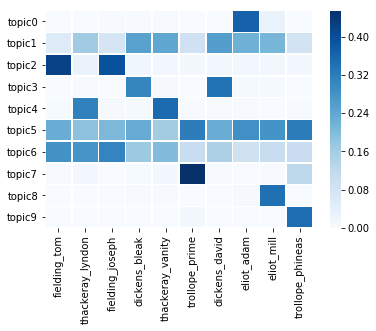

In [9]:
%matplotlib inline

vis.topic_document()

or visualizing how _dominant_ specific words are in a topic:

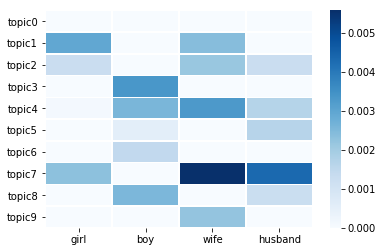

In [10]:
vis.topic_word(words=["girl", "boy", "wife", "husband"])

How topics are distributed in a document:

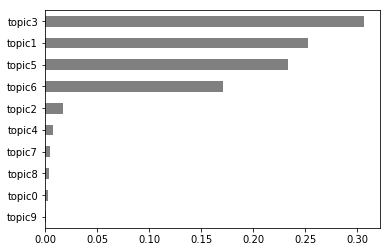

In [11]:
vis.document("dickens_bleak")

or words in a topic:

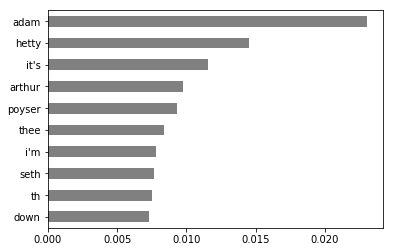

In [12]:
vis.topic("topic0")

## Advanced topic modeling

Check out the other notebooks for more advanced topic modeling.